In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

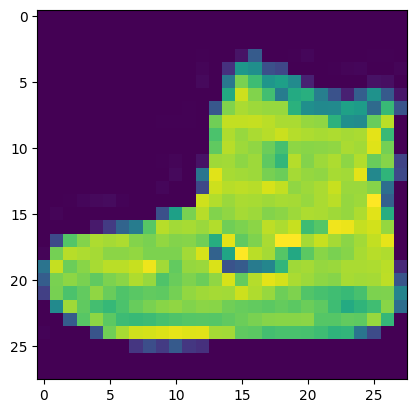

In [4]:
# Put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=200)

# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {x_train[index]}')

# Visualize the image
plt.imshow(x_train[index])

In [5]:
# Normalize the pixel values of the train and test images
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [7]:
results = list()  # each item is a triplet of {neuron, epoch, accuracy}

# Set the random seed for reproducibility
np.random.seed(1)


In [8]:
def trainModel(neuron, epoch):
    print(f"\nTraining for {neuron} Neurons and {epoch} Epoch\n")
    # Build the classification model
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # Converts 28x28 into 784x1 array
                                     tf.keras.layers.Dense(neuron, activation='relu'),
                                     tf.keras.layers.Dense(10, activation='softmax')])
    # Compile the model
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Train the model
    model.fit(x_train, y_train, epochs=epoch)

    # Save the model
    model.save(f"saved_models\\{neuron}N_{epoch}E.h5")

In [9]:
def evaluate(model_path):
    # Extract the number of neurons
    neuron = int(re.search(r"\\(\d+)N_", model_path).group(1))
    
    # Extract the number of epochs
    epoch = int(re.search(r"_(\d+)E\.", model_path).group(1))
    
    # Load the model
    model = tf.keras.models.load_model(model_path)
    
    # Evaluate the model on unseen data
    loss, accuracy = model.evaluate(x_test, y_test)
    accuracy = round(accuracy,4)
    
    print(f"Accuracy = {accuracy} for {neuron} Neurons and {epoch} Epoch\n")
    results.append([neuron, epoch, accuracy])

In [10]:
for neuron in [128,256,512,1024]:
    trainModel(neuron, 5)


Training for 128 Neurons and 5 Epoch

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5005 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3710 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3354 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3136 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2938 - accuracy: 0.8920

Training for 256 Neurons and 5 Epoch

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4841 - accuracy: 0.8277
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3641 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3276 - accuracy: 0.8799
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3053 - accuracy: 0.8876
Epoch 5/5
187

In [15]:
for neuron in [128,256,512,1024]:
    print(f"\nTraining for {neuron} Neurons from Epoch 5 to Epoch 10\n")
    model = tf.keras.models.load_model(f'saved_models\\{neuron}N_5E.h5')
    model.fit(x_train,y_train,epochs=5)
    model.save(f'saved_models\\{neuron}N_10E.h5')


Training for 128 Neurons from Epoch 5 to Epoch 10

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2800 - accuracy: 0.8962
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2659 - accuracy: 0.9019
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2572 - accuracy: 0.9050
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2473 - accuracy: 0.9080
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2397 - accuracy: 0.9097

Training for 256 Neurons from Epoch 5 to Epoch 10

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2705 - accuracy: 0.8986
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9032
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9067
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2375 - accu

In [16]:
for neuron in [128,256,512,1024]:
    print(f"\nTraining for {neuron} Neurons from Epoch 10 to Epoch 15\n")
    model = tf.keras.models.load_model(f'saved_models\\{neuron}N_10E.h5')
    model.fit(x_train,y_train,epochs=5)
    model.save(f'saved_models\\{neuron}N_15E.h5')


Training for 128 Neurons from Epoch 10 to Epoch 15

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2313 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2246 - accuracy: 0.9162
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2168 - accuracy: 0.9180
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2113 - accuracy: 0.9214
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2053 - accuracy: 0.9240

Training for 256 Neurons from Epoch 10 to Epoch 15

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2204 - accuracy: 0.9169
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2126 - accuracy: 0.9195
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2052 - accuracy: 0.9226
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1985 - ac

In [17]:
for neuron in [128,256,512,1024]:
    print(f"\nTraining for {neuron} Neurons from Epoch 15 to Epoch 20\n")
    model = tf.keras.models.load_model(f'saved_models\\{neuron}N_15E.h5')
    model.fit(x_train,y_train,epochs=5)
    model.save(f'saved_models\\{neuron}N_20E.h5')


Training for 128 Neurons from Epoch 15 to Epoch 20

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2002 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1949 - accuracy: 0.9265
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1888 - accuracy: 0.9294
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1845 - accuracy: 0.9306
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1805 - accuracy: 0.9320

Training for 256 Neurons from Epoch 15 to Epoch 20

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1872 - accuracy: 0.9301
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1807 - accuracy: 0.9319
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1745 - accuracy: 0.9349
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1721 - ac

In [18]:
import os

folder_path = "E:\Projects\Fashion Identifier\saved_models"  # Replace with the path to your folder

# Iterate through every file name inside the folder
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    print(file_path)
    evaluate(file_path)

E:\Projects\Fashion Identifier\saved_models\1024N_10E.h5
313/313 [==============================] - 1s 3ms/step - loss: 0.3430 - accuracy: 0.8798
Accuracy = 0.8798 for 1024 Neurons and 10 Epoch

E:\Projects\Fashion Identifier\saved_models\1024N_15E.h5
313/313 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8930
Accuracy = 0.893 for 1024 Neurons and 15 Epoch

E:\Projects\Fashion Identifier\saved_models\1024N_20E.h5
313/313 [==============================] - 1s 2ms/step - loss: 0.3633 - accuracy: 0.8958
Accuracy = 0.8958 for 1024 Neurons and 20 Epoch

E:\Projects\Fashion Identifier\saved_models\1024N_5E.h5
313/313 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8701
Accuracy = 0.8701 for 1024 Neurons and 5 Epoch

E:\Projects\Fashion Identifier\saved_models\128N_10E.h5
313/313 [==============================] - 0s 954us/step - loss: 0.3312 - accuracy: 0.8852
Accuracy = 0.8852 for 128 Neurons and 10 Epoch

E:\Projects\Fashion Identifi

In [19]:
for i in results:
    print(i)

[1024, 10, 0.8798]
[1024, 15, 0.893]
[1024, 20, 0.8958]
[1024, 5, 0.8701]
[128, 10, 0.8852]
[128, 15, 0.8842]
[128, 20, 0.8854]
[128, 5, 0.8761]
[256, 10, 0.8802]
[256, 15, 0.8818]
[256, 20, 0.8924]
[256, 5, 0.8711]
[512, 10, 0.8838]
[512, 15, 0.8908]
[512, 20, 0.8899]
[512, 5, 0.8795]


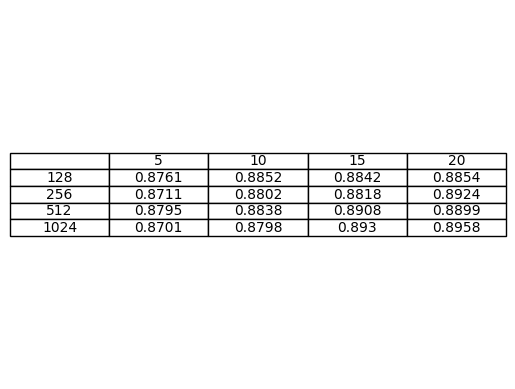

In [52]:
neurons = list(set(result[0] for result in results))
epochs = list(set(result[1] for result in results))
neurons.sort()
epochs.sort()

fig, ax = plt.subplots()
table_data = [[''] + epochs]
for neuron in neurons:
    row_data = [neuron]
    for epoch in epochs:
        matching_data = next((result[2] for result in results if result[0] == neuron and result[1] == epoch), None)
        row_data.append(matching_data)
    table_data.append(row_data)

table = plt.table(cellText=table_data, loc='center', cellLoc='center')
ax.axis('off')

plt.show()

#### Seeing effects of Conv2D and MaxPooling on a image 

In [57]:
x_train[0].shape

(28, 28)

In [75]:
# Reshape the input array to match the expected input shape of Conv2D (height, width, channels)
input_array = np.expand_dims(x_train[0]*255, axis=-1)

# We are using 64 filters hence the image will be converted to 64 different images corresponding to each filter
model_conv2d = tf.keras.models.Sequential(
                tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape = input_array.shape))


output_conv2d = model_conv2d.predict(np.expand_dims(input_array, axis=0))


1/1 [==============================] - 0s 47ms/step


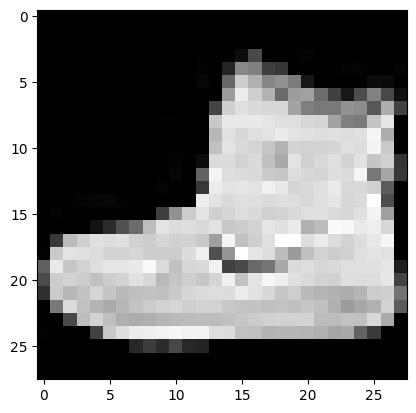

In [80]:
# Visualize original image
plt.imshow(x_train[0],cmap='gray')

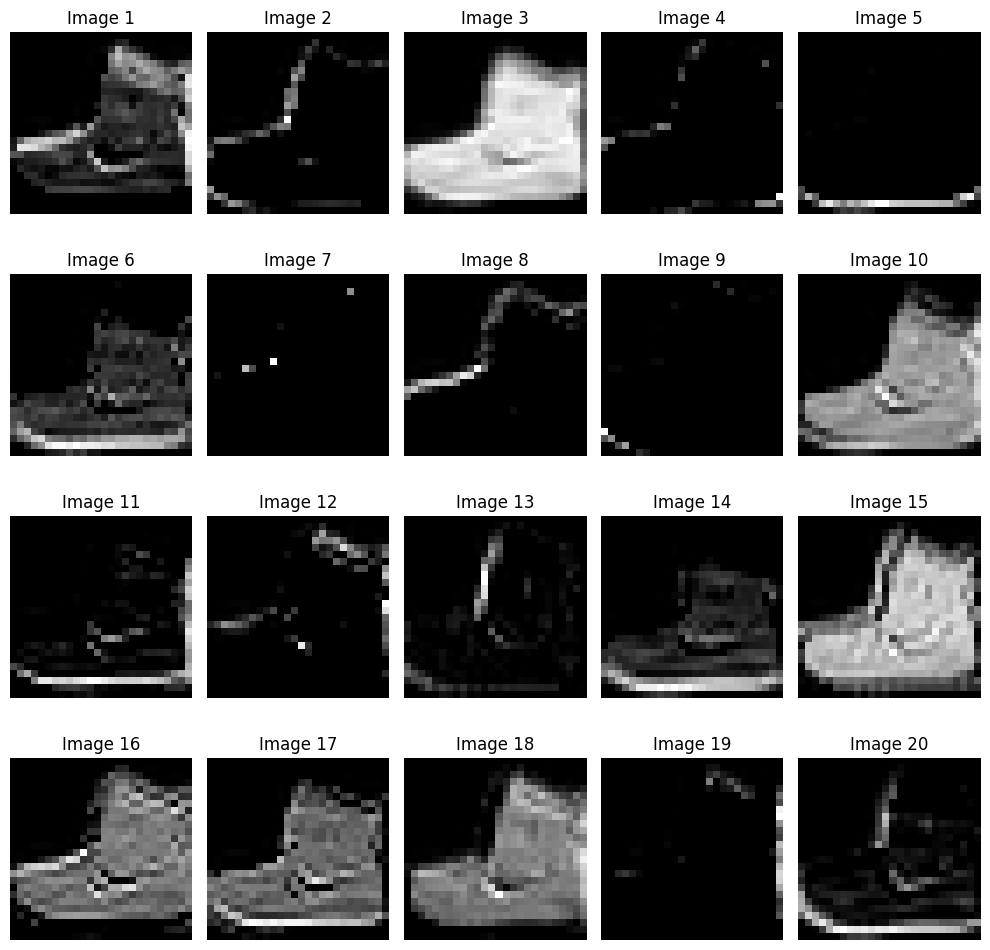

In [93]:
# Plot 20 images from the Conv2D output in a grid of 4x5
fig, axes = plt.subplots(4, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(output_conv2d[0, :, :, i], cmap='gray')
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()